# Automotive Price Predictor

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
#get the unique types
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [14]:
#check if any nullvalues
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

__Basic Visualisation & conclusion__

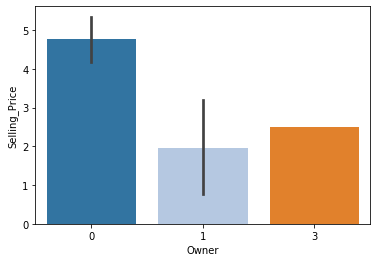

In [16]:
import seaborn as sns
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='tab20')

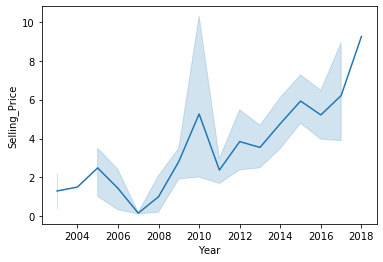

In [17]:
sns.lineplot(x='Year',y='Selling_Price',data=df,palette='tab20')

__Here we can observe that the car is older it's selling price is low as compared to the vehicles manufactured recently, Pretty obvious!!__

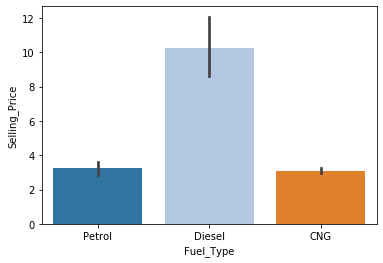

In [18]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='tab20')

___Clearly here, Diesel comprises the largest share with CNG lowest___

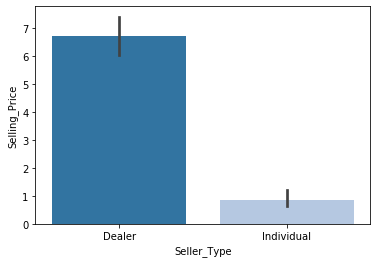

In [19]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='tab20')

___The dealer has the selling price highest, as they have a good experience in getting the customers than individual does___

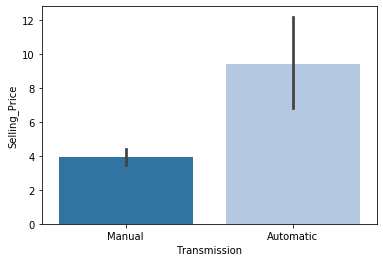

In [20]:
#selling price for manual and automatic vehicles!
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='tab20')

### Creating the final data set

In [21]:
#Creating 'number of years' by subtracting with the year 2020 as of today
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [22]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
final_dataset['Current_Year']=2020

In [24]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [25]:
final_dataset['Number_of_Years']=final_dataset['Current_Year']-final_dataset['Year']

In [26]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [27]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [28]:
final_dataset.head() #after dropping Year

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [29]:
#after dropping Current Year
final_dataset.drop(['Current_Year'], axis=1, inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [30]:
final_dataset= pd.get_dummies(final_dataset, drop_first=True) #to prevent from dummy variable trap, we have used drop_first=True

In [31]:
final_dataset.head() #here the fuel CNG is dropped since if three fuel types are there & we have 0,0 in both it means
#that it's 1 in the third category so, no need to have CNG column, we can get the idea from petrol & diesel itself

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [32]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


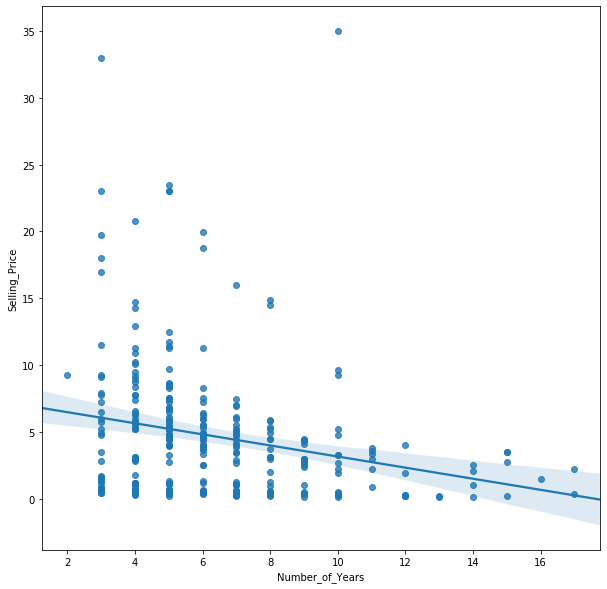

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.regplot(x='Number_of_Years',y='Selling_Price',data=final_dataset)

_Similar to what we found earlier, here it shows as the age of the car increases the selling price goes down, Depreciation of assest_

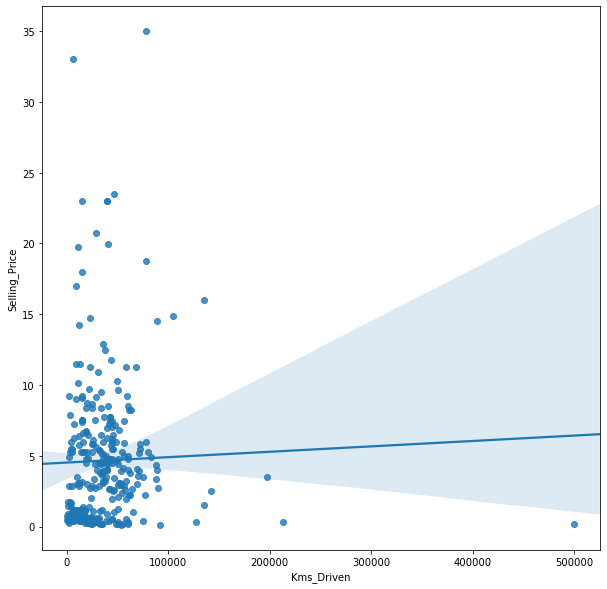

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(x='Kms_Driven',y='Selling_Price',data=final_dataset)

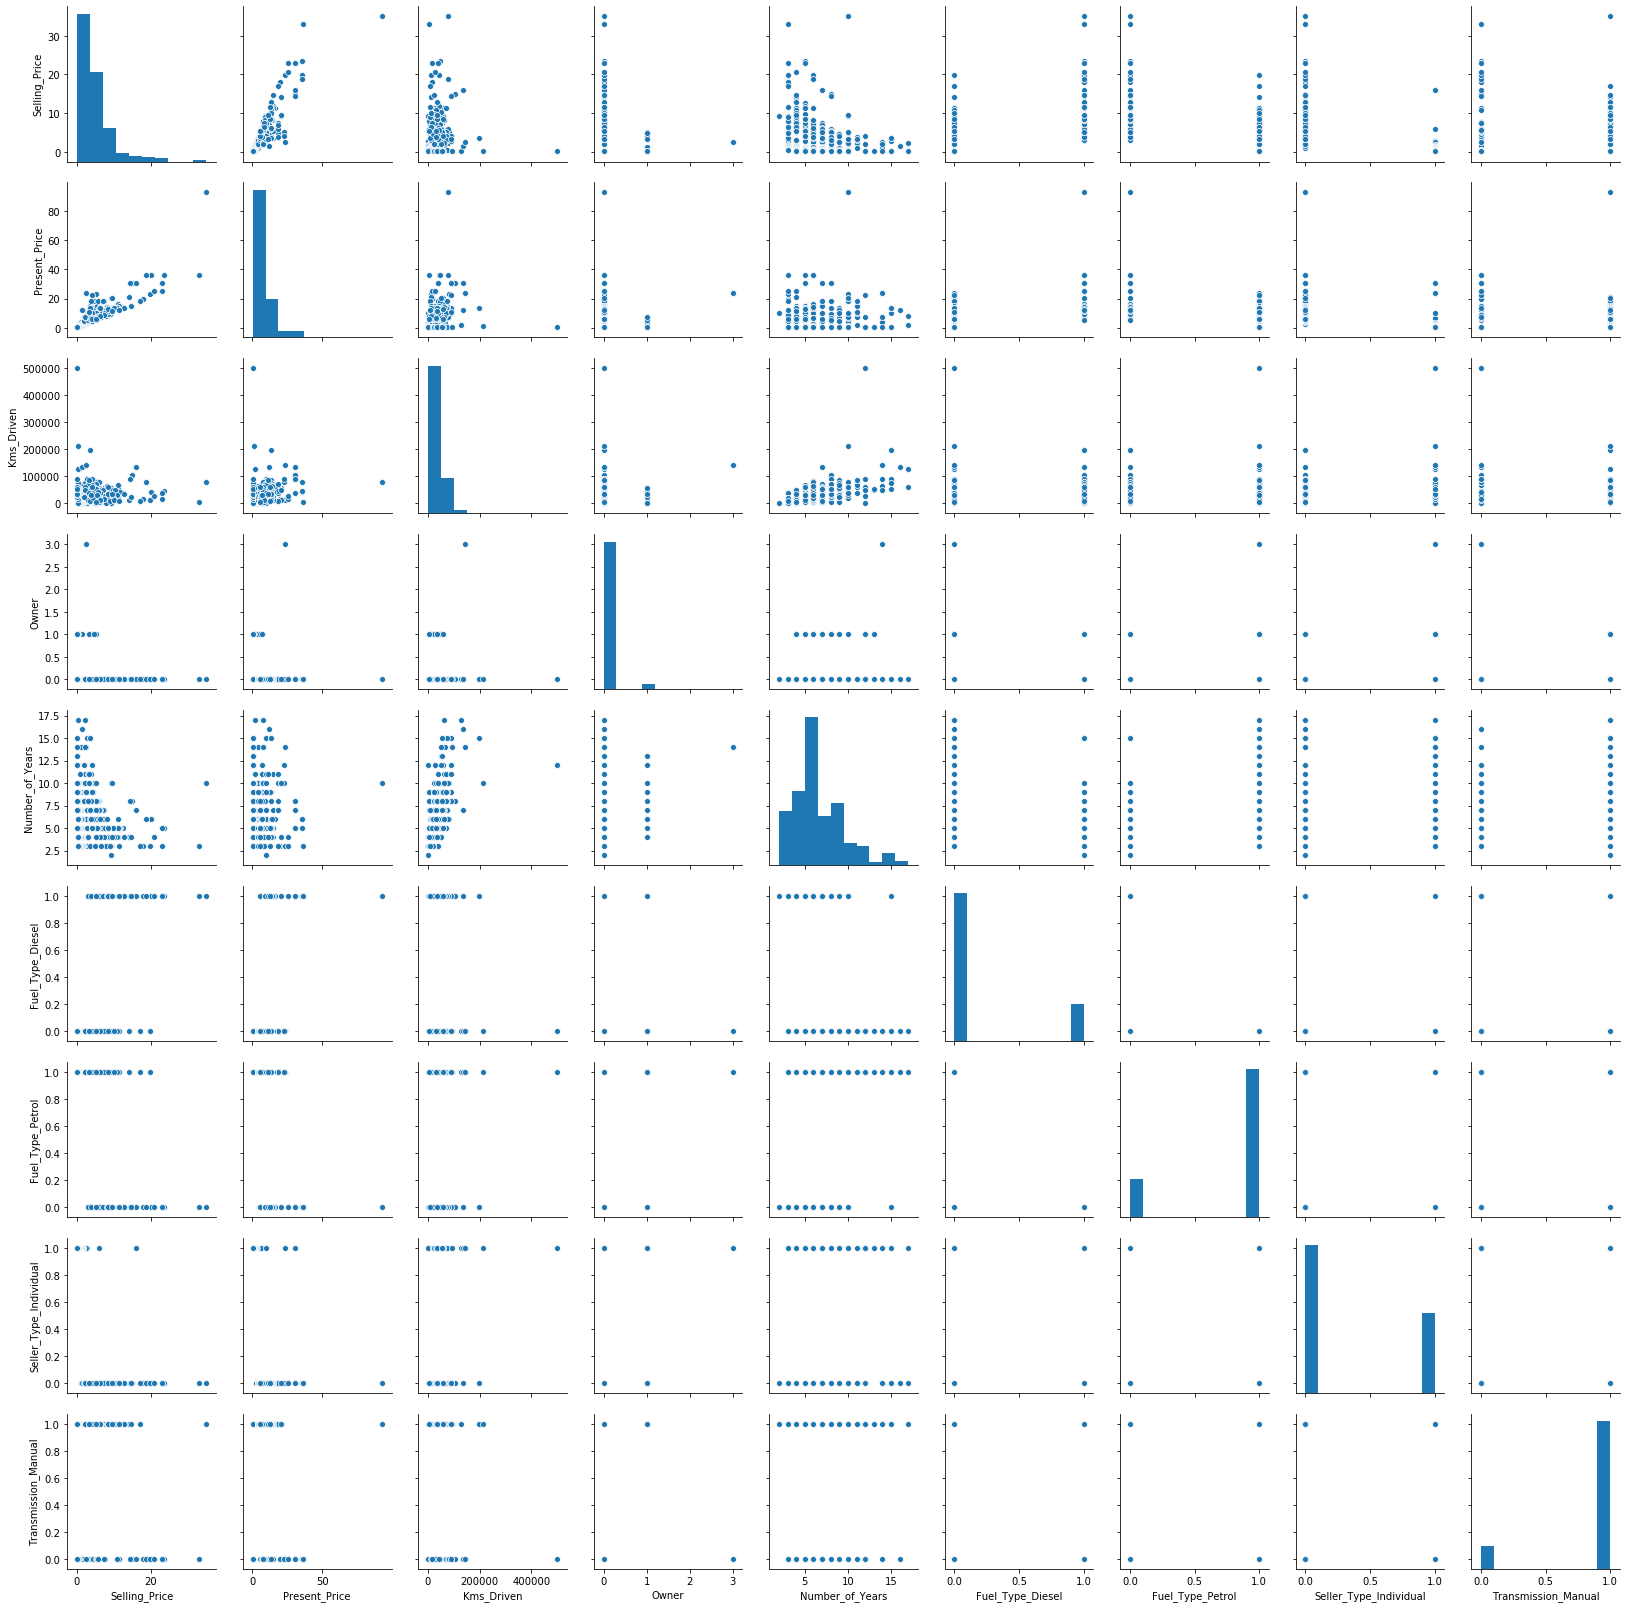

In [35]:
import seaborn as sns
sns.pairplot(final_dataset)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

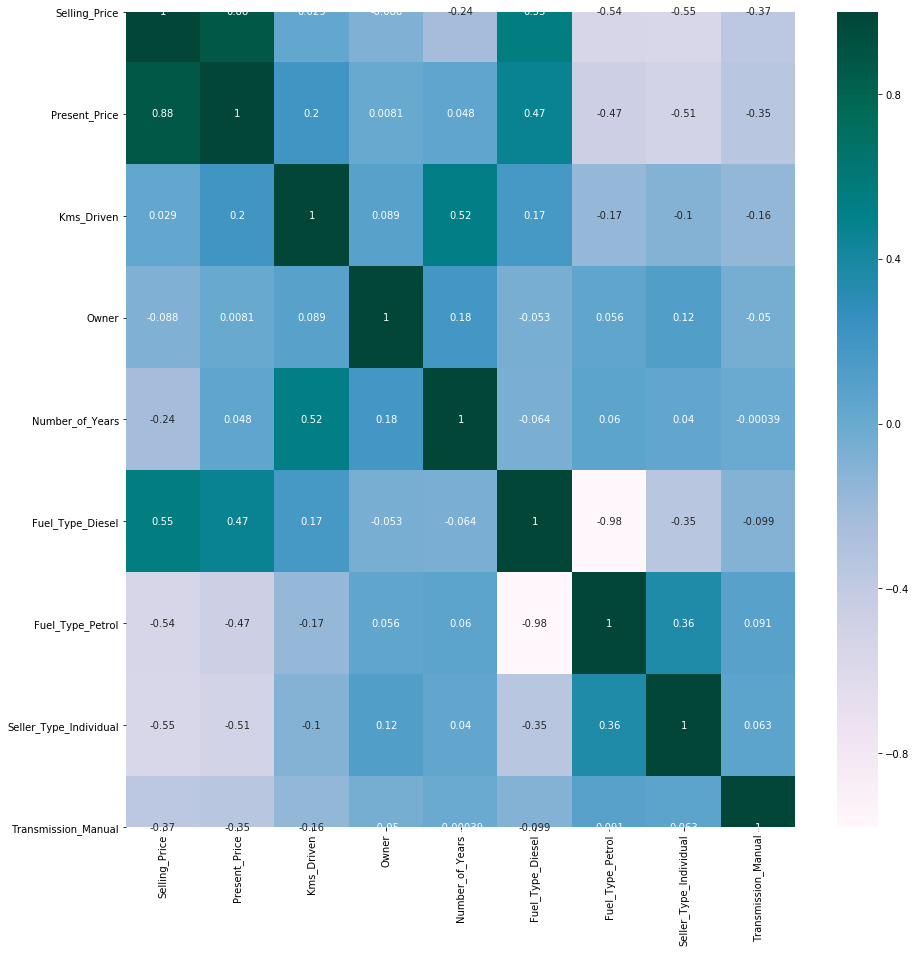

In [37]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
#plot heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(), annot=True,cmap='PuBuGn')
# cmap= 'Bupu', "YlGnBu", ""

- __The selling price & present price are highly positively correlated__


- __fuel type petrol & diesel are negatively correlated__

In [38]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Separate the data & target label 

In [39]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [40]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [41]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Find the feature importance 

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
# An extra-trees regressor.This class implements a meta estimator that fits a number of
# randomized decision trees (a.k.a. extra-trees) on various sub-samples
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [43]:
print(model.feature_importances_)

[0.35088528 0.04068148 0.00042502 0.07274787 0.24043154 0.01286575
 0.13983282 0.14213024]


- _Present price has highest feature importance_ ___0.389___

- _Fuel_type_diesel has 2nd highest feature importance_ ___0.216___

- _Owner has least feature importance_ ___0.00082658 ___

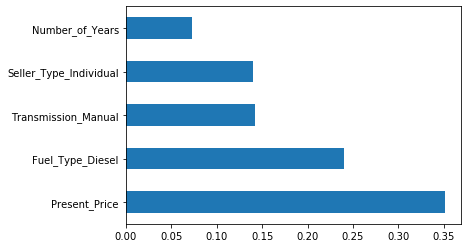

In [44]:
#plot a graph for the same 
fea_imp=pd.Series(model.feature_importances_, index=X.columns)
fea_imp.nlargest(5).plot(kind='barh')
plt.show()

## Split the data into train & test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [46]:
X_train.shape

(240, 8)

In [47]:
#RF regressor since scaling value is excluded since decision trees are used.
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [48]:
#hyperparameter
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12 )]

In [49]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [50]:
#Randomized search CV

#To select the number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200,num=12 )]
#number of features to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in the trees 
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV
#Helps in finding the best parameters mentioned above like, estimators?, depth?, split?etc.

In [52]:
#Create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# here we use the random grid to search for the best hyperparameters
#Creating a base model for tuning 
rf=RandomForestRegressor()

In [54]:
rf_random = RandomizedSearchCV(estimator =rf, param_distributions= random_grid,
                              scoring='neg_mean_squared_error',n_iter=10, cv=5,
                              verbose=2,random_state=42,n_jobs=1)

#n_iter tradesoff runtime vs quality of the solution.
#Number of jobs to run in parallel. using all CPU cores
#CV: None, to use the default 5-fold cross validation,
#     - integer, to specify the number of folds in a `(Stratified)KFold`,
#     - :term:`CV splitter`,
#     - An iterable yielding (train, test) splits as arrays of indices.

In [62]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
predictions= rf_random.predict(X_test)

In [64]:
predictions

array([ 5.48115692,  9.40578443,  2.82372608,  4.8593394 ,  5.21808233,
        0.29085629,  0.31864445,  7.32218947,  4.77025475,  5.23330037,
        5.73350858,  0.27684094,  0.87136032,  2.57544167,  2.74180965,
       13.35436159,  0.58754937,  2.94867262, 10.64570887,  5.48585336,
        4.89653524,  0.27419188, 20.53104608,  0.47185515,  7.17752134,
        1.1751406 ,  0.43587097,  7.19494956,  2.91144038,  4.82023748,
        7.1445965 ,  0.24416217,  1.18020402,  0.55390345,  7.67019083,
        1.17926302,  4.84069236,  0.51189093, 12.84215383,  0.68239013,
        7.646956  ,  0.63802069,  1.29266234,  3.46757446,  7.78357459,
        4.88958728, 10.54515915,  5.34808727,  5.75922063,  0.42268679,
        5.33012884,  1.16055745, 20.62284473,  0.60092906,  7.53324268,
        5.38437438,  0.32236818,  7.62187348,  4.77868517,  7.0157467 ,
        1.16673175])

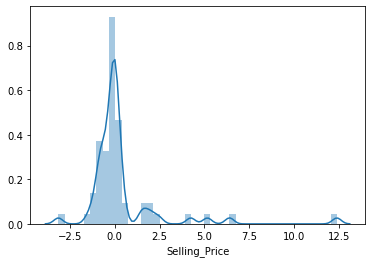

In [65]:
sns.distplot(y_test-predictions) #difference of actual & predicted

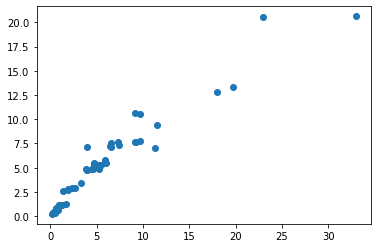

In [66]:
plt.scatter(y_test,predictions) #linear predictions

In [67]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print('MAE:',metrics.mean_absolute_error(y_test, predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
R2_score = r2_score(y_test, predictions)
print("R2 Score: ",R2_score)

MAE: 0.9752203011771556
MSE: 4.602331159983469
RMSE: 2.145304444591366
R2 Score:  0.8701107555299145


___The R2 Score here is 0.89 which is quite good___

### Results


In [68]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions})
result_df.head()

,Real Values,Predicted Values
1,4.75,5.481157
299,11.50,9.405784
42,1.95,2.823726
36,4.65,4.859339
209,4.85,5.218082


_We can observe here that the values predicted are quite near to the actual values so this model is quite acceptable_

__Thus, this model can be deployed & it can predict the price of a car based on the present price.__

## Storing in a Pickle file

In [69]:
import pickle
#open a file to store this data
file=open('random_forest_regression_model1.pk1','wb') # wb-Writebyte mode

#duming the information to this file
pickle.dump(rf_random,file)

## Next steps: Create reqirements.txt

-  Open Anaconda prompt


-  activate car prediction (your environment name)


-  Change the directory to be in the current folder of your jupyter notebook


-  (to freeze the requirements) in prompt type: pip freeze (ENter) then type requirements.txt 
    
    
-  Modelfile has created


### Spyder ENV for front End

- app.py required

- > First open Anaconda prompt 

- > activatie your env (Enter) 

- > pip install flask (Enter) 

- > pip install jsonify (Enter)

- > pip install requests (Enter)